# Pandas pour l'analyse de données

In [ ]:
import pandas as pd

In [4]:
df = pd.read_excel("../../data/anr-dos-depuis-2010-projets-finances-20250202-projets.xlsx")

In [10]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.shape

(23229, 10)

In [7]:
df.columns

Index(['Projet.Code_Decision_ANR', 'AAP.Edition', 'Projet.Acronyme',
       'Projet.Titre.Francais', 'Projet.Titre.Anglais',
       'Projet.Resume.Francais', 'Projet.Resume.Anglais', 'Programme.Acronyme',
       'Projet.Montant.AF.Aide_allouee.ANR', 'Projet.T0 scientifique'],
      dtype='object')

In [9]:
df.head(5)

,Projet.Code_Decision_ANR,AAP.Edition,Projet.Acronyme,Projet.Titre.Francais,Projet.Titre.Anglais,Projet.Resume.Francais,Projet.Resume.Anglais,Programme.Acronyme,Projet.Montant.AF.Aide_allouee.ANR,Projet.T0 scientifique
0,ANR-24-THCS-0004,2024,Digital CACTUS,Digital CAre Contribution to the Transformatio...,Digital CAre Contribution to the Transformatio...,"In Western countries, about 40% of adults have...",NaN,THCS,531359.1,2024-09-01
1,ANR-24-THCS-0003,2024,EU-MIND,EUropean Mental and physical health Initiative...,EUropean Mental and physical health Initiative...,"Over a 3-year project, EU-MINDs ambition is to...",NaN,THCS,188209.6,2024-06-12
2,ANR-24-THCS-0002,2024,RENEW,Reshaping data-driven smart healthcare to opti...,Reshaping data-driven smart healthcare to opti...,The demand for convenient and accurate medical...,NaN,THCS,259571.5,2024-06-01
3,ANR-24-THCS-0001,2024,MI-RICORDO,Transcultural and Multidimensional validation ...,Transcultural and Multidimensional validation ...,"Among NCD-related disabilities, cognitive impa...",NaN,THCS,260000.0,2024-09-30
4,ANR-24-SS22-0012,2024,TROPIQUES,Tristes Tropiques Numérique,Digital Tristes Tropiques,"L’équipe de l’EHESS, coordonnée par Emmanuel D...","The EHESS team, coordinated by Emmanuel Désvea...",SAPS,2500.0,2024-10-01


In [12]:
df.rename(columns={"AAP.Edition":"annee", "Projet.Montant.AF.Aide_allouee.ANR":"montant"}, inplace=True)

In [14]:
df.isna().sum()

Projet.Code_Decision_ANR       0
annee                          0
Projet.Acronyme                0
Projet.Titre.Francais        567
Projet.Titre.Anglais         349
Projet.Resume.Francais      1899
Projet.Resume.Anglais       1190
Programme.Acronyme             0
montant                        0
Projet.T0 scientifique         2
dtype: int64

In [19]:
(df["montant"]).mean()

391866.37686168146

In [28]:
(df["montant"]).std()

224131.73683343388

In [30]:
(df["montant"]).describe()

count    2.322900e+04
mean     3.918664e+05
std      2.241317e+05
min      2.500000e+03
25%      2.451600e+05
50%      3.630000e+05
75%      5.168727e+05
max      6.480000e+06
Name: montant, dtype: float64

In [23]:
df[["annee","montant"]].head()

,annee,montant
0,2024,531359.1
1,2024,188209.6
2,2024,259571.5
3,2024,260000.0
4,2024,2500.0


In [26]:
df.loc[2300,"annee"]

2023

Pour exporter

In [27]:
df.to_excel("export.xlsx")

Quel est le projet le plus financé en 2020

In [39]:
df[df["annee"] == 2020].sort_values("montant", ascending=False)[0:2]

,Projet.Code_Decision_ANR,annee,Projet.Acronyme,Projet.Titre.Francais,Projet.Titre.Anglais,Projet.Resume.Francais,Projet.Resume.Anglais,Programme.Acronyme,montant,Projet.T0 scientifique
8634,ANR-20-THIA-0013,2020,UDOPIA,Programme Doctoral en Intelligence Artificiell...,Université Paris-Saclay Doctoral Programme in ...,Le programme de doctorat UDOPIA en intelligenc...,The UDOPIA doctoral program in Artificial Inte...,PNIA,1800000.0,2020-09-01
8658,ANR-20-SEBM-0001,2020,PLANT,Priorité aux menaces des toxines de plantes: m...,Priority to threats posed by plant toxins: man...,.Les toxines biologiques sont une source de pr...,Biological toxins are a focus of concern by pu...,SEBM,1577808.0,2021-03-01


In [42]:
df[df["annee"] == 2020]["montant"].sum()/10e6

62.219525598000004

<Axes: title={'center': 'Nombre de projets par années'}, xlabel='Années', ylabel='Nombre de projets'>

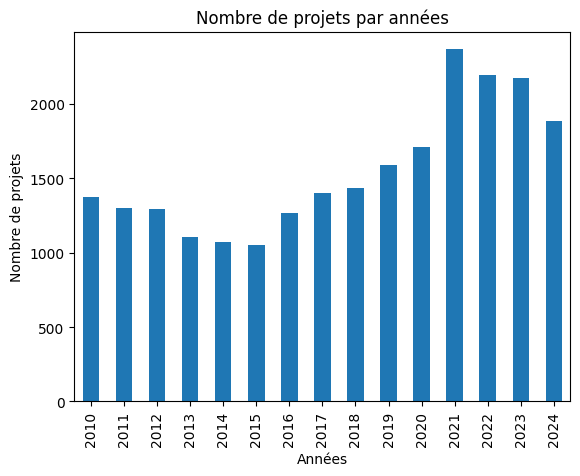

In [52]:
df["annee"].value_counts().sort_index().plot(kind='bar', title="Nombre de projets par années", xlabel = "Années", ylabel = "Nombre de projets")

<Axes: xlabel='annee'>

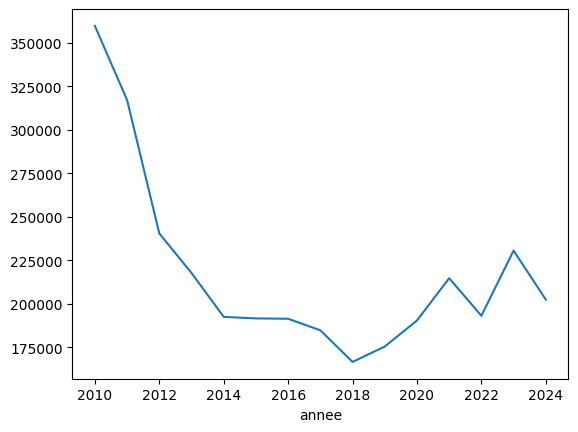

In [55]:
df.groupby("annee")["montant"].std().plot()

In [63]:
f = df["Projet.Titre.Francais"].str.lower().str.contains("science ouverte").fillna(False)

/var/folders/f9/d2d_05ws5gncmml0fx0c00kw0000gp/T/ipykernel_6910/1191315583.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f = df["Projet.Titre.Francais"].str.lower().str.contains("science ouverte").fillna(False)


In [66]:
list(df[f]["Projet.Titre.Francais"])

['Science ouverte pour les Sciences Humaines et Sociales',
 'Appliquer la Science Ouverte aux Données Issues de projets supportés par des appels d’Offres nationaux à enjeux sociétaux',
 'Traduction automatique pour la science ouverte',
 'Impulser la science ouverte au sein du Dispositif de Recherche Interdisciplinaire sur les Interactions Hommes-Milieux (DRIIHM) : co-design d’une e-infrastructure intégrant les principes FAIR',
 'Science ouverte pour la Conservation / Restauration du patrimoine culturel',
 'Matilda: un outil biobliographique et bibliométrique pour la science ouverte']

In [75]:
f = df["Projet.Resume.Anglais"].str.lower().str.contains("artificial intelligence").fillna(False)

/var/folders/f9/d2d_05ws5gncmml0fx0c00kw0000gp/T/ipykernel_6910/615132348.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f = df["Projet.Resume.Anglais"].str.lower().str.contains("artificial intelligence").fillna(False)


In [77]:
df["ia"] = f

<Axes: xlabel='annee'>

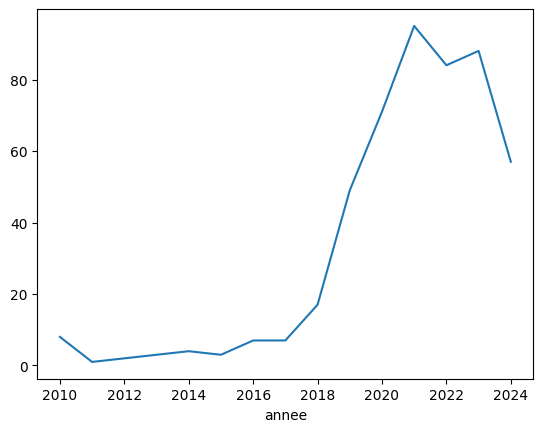

In [79]:
df.groupby("annee")["ia"].sum().plot()

User guide : https://pandas.pydata.org/docs/user_guide/10min.html  
Cheat Sheet : https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

## Importer Pandas

Et le format DataFrame

## Charger des données

## Explorer les données

**Quelques outils utiles :**  
- `.info()` des infos sur notre df  
- `.shape` sa "forme"  
- `.columns` les colonnes  
- `.dtypes` le type des données  
- `.head()` afficher les premières observations  
- `.tail()` afficher la fin du df  
- `.describe()` description basique  

## Manipuler un DataFrame

- sélectionner une colonne, une ligne, un élément
- comprendre l'indexation (iloc, loc)

## Calculer sur des colonnes

Quelques outils utiles pour décrire les données :

- `mean()`
- `std()`
- `min()`
- `max()`
- `count()`
- `describe()`
- `unique()` (et `nunique()`)
- `value_counts()`

## Aller vers une base de données

- filtrer
- grouper
- aller plus loin (join, etc.)

## Modifier le tableau

- colonnes, index
- contenu

## Recoder

- remplacer
- valeurs nulles
- fonctions comme .cut
- solition générique de .apply

## Faire des statistiques

- univariées
- bivariées : tableau croisé
- grouper des tableaux (.concat)
- visualisations

## Sauvegarder les données

## Et plein d'autres choses 

- échantillon aléatoire avec .sample()